In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

In [10]:
df = pd.read_csv("https://github.com/lucolivi/sentiment_analysis_dataset/raw/main/dataset.csv")

In [11]:
print("Quantidade de linhas:", df.shape[0])
df.head()

Quantidade de linhas: 31014


,text,sentiment
0,Listening music with my friend,neutral
1,Thank you for sharing. I appreciate your hone...,positive
2,Yay Happy Mother`s Day #fb,positive
3,Home from school. Out tonight? Probably not,neutral
4,Shower time,neutral


In [12]:
print("Distribuição das classes:")

pd.DataFrame(data=[
	df.sentiment.value_counts(),
	df.sentiment.value_counts(normalize=True)
])

Distribuição das classes:


sentiment,neutral,positive,negative
count,12547.000000,9685.000000,8782.000000
proportion,0.404559,0.312278,0.283162


In [13]:
train_df, test_df = train_test_split(
	df,
	test_size=0.1,
	random_state=2
)

In [14]:
clf = make_pipeline(
	CountVectorizer(
    	strip_accents="unicode",
    	stop_words="english",
    	ngram_range=(1, 2),
	),
	RandomForestClassifier(n_estimators=5, random_state=2, n_jobs=None, verbose=0)
)

In [15]:
clf.fit(train_df.text, train_df.sentiment)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english',
                                 strip_accents='unicode')),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=5, random_state=2))])

In [16]:
clf.predict([
	"My day was pretty good!", # Positivo
	"Hello!",  # Neutro
	"The product I bought was awful" # Negativo
])

array(['positive', 'neutral', 'negative'], dtype=object)

In [17]:
y_true = test_df.sentiment
y_pred = clf.predict(test_df.text)

In [18]:
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average="macro"))
print("Recall:", recall_score(y_true, y_pred, average="macro"))
print("F1 Score:", f1_score(y_true, y_pred, average="macro"))

Accuracy: 0.6537717601547389
Precision: 0.661001107651523
Recall: 0.6473612185586052
F1 Score: 0.652403015795524


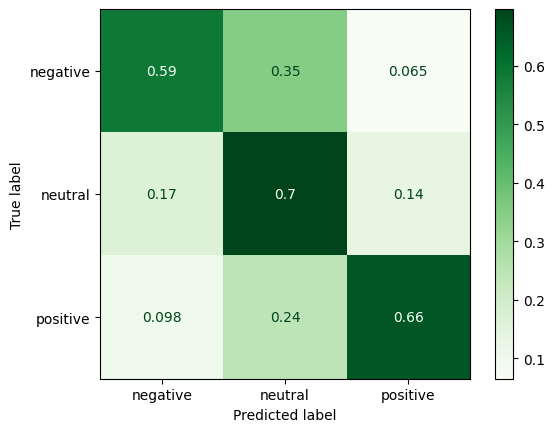

In [19]:
cm = confusion_matrix(y_true, y_pred, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
p_obj = disp.plot(cmap="Greens")